In [1]:
import numpy as np
import pandas as pd
import random as rd
import math
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
pic_num = 0
MAXINT = 0xFFFFFFFF

#### 读取文件

In [2]:
path1 = "F:\ECNU2020_2\人工智能\上机作业\作业5\\10172100163_5\\1.csv"
path2 = "F:\ECNU2020_2\人工智能\上机作业\作业5\\10172100163_5\\2.csv"
path = "F:\ECNU2020_2\人工智能\上机作业\作业5\\10172100163_5\\"
dat1 = pd.read_csv(path1, header=None).values
dat2 = pd.read_csv(path2, header=None).values
print(dat1)
print(dat2)

[[ 2.43498665 -5.02470805 -5.10120911]
 [ 6.12570562 -8.33665508 -8.76310509]
 [-5.54209374 -3.69277646  7.56164088]
 ...
 [ 3.17246371 -5.55108319 -6.38677722]
 [10.26639547  4.59370789  5.68184258]
 [ 8.51154248  7.61025107  2.92743849]]
[[-11.73250419  -0.10123477]
 [-10.69722546  -1.21628156]
 [  6.81540132   4.88999371]
 ...
 [ -5.79247959  -3.23911694]
 [  9.25212083   3.94044941]
 [  8.07677785   3.7404787 ]]


#### K-means

In [3]:
def calcdis(a,b,sp):
    ret = 0
    for i in range(sp):
        ret += (a[i]-b[i])*(a[i]-b[i])
        ret = math.sqrt(ret)
    return ret

def calcmean(dat,cla,typenum,sp):
    mean = []
    c =  0
    for g in cla:
        sum1 = [0 for i in range(sp)]
        l = len(g)
        for f in g:
            for j in range(sp):
                sum1[j]+=dat[f][j]
        for j in range(sp):
            sum1[j]/=l
        mean.append(sum1)
    return mean

    
def kmeans(dat,typenum,maxiter): #typenum:类簇个数 maxiter:最大迭代次数
    l = len(dat) #数据个数
    sp = len(dat[0]) #特征数
    seedele = rd.sample(range(0,l),typenum)
    seed = [[dat[k][i] for i in range(sp)] for k in seedele]
    for itertime in range(maxiter):
        cla = [[] for i in range(typenum)]
    #计算距离分类
        for ele in range(l):
            min_i=0
            min_dist = MAXINT
            for i in range(typenum):
                dist = calcdis(dat[ele],seed[i],sp)
                if dist<min_dist:
                    min_dist=dist
                    min_i=i
            cla[min_i].append(ele)
    #计算均值
        seednew = calcmean(dat,cla,typenum,sp)
    #考虑是否已经收敛
        flag = 0 #收敛
        for i in range(len(seed)):
            for j in range(len(seed[i])):
                if seed[i][j]!=seednew[i][j]:
                    flag=1
                    seed = seednew
                    break
                if flag==1:
                    break
        if flag==0:
            print("Iter-round:%d"% itertime)
            break
        #print(seed)
    #print("CLASSIFICATION:")
    #print(cla)
    #加列输出
    f=0
    dat=dat.tolist()
    labels=[-1 for i in range(l)]
    for g in cla:
        for i in g:
            dat[i].append(f)
            labels[i]=f
        f+=1
    return labels

#### 可视化

In [4]:
def draw(dat,labels):
    global pic_num
    if len(dat)>2:
        model = TSNE()
        Y = model.fit_transform(dat)
    else:
        Y=dat
    plt.scatter(Y[:,0], Y[:,1], 10, labels)
    str1 = path+str(pic_num)+".png"
    pic_num+=1
    plt.savefig(str1)
    plt.show()


#### 评估效果

In [5]:
def metric():
    ch1=[]
    sh1=[]
    ch2=[]
    sh2=[]
    for i in range(20):
        ch1.append(calinski_harabasz_score(dat1,kmeans(dat1,3,100)))
        sh1.append(silhouette_score(dat1,kmeans(dat1,3,100)))
        ch2.append(calinski_harabasz_score(dat2,kmeans(dat2,4,100)))
        sh2.append(silhouette_score(dat2,kmeans(dat2,4,100)))
    ch1 = np.array(ch1)
    ch2 = np.array(ch2)
    sh1 = np.array(sh1)
    sh2 = np.array(sh2)
    ret=[np.mean(ch1),np.mean(sh1),np.mean(ch2),np.mean(sh2)]
    return ret

print(metric())

Iter-round:5
Iter-round:3
Iter-round:4
Iter-round:41
Iter-round:6
Iter-round:11
Iter-round:27
Iter-round:26
Iter-round:8
Iter-round:5
Iter-round:23
Iter-round:6
Iter-round:6
Iter-round:17
Iter-round:7
Iter-round:36
Iter-round:15
Iter-round:5
Iter-round:31
Iter-round:33
Iter-round:11
Iter-round:7
Iter-round:7
Iter-round:10
Iter-round:7
Iter-round:6
Iter-round:31
Iter-round:9
Iter-round:5
Iter-round:8
Iter-round:29
Iter-round:38
Iter-round:8
Iter-round:13
Iter-round:32
Iter-round:18
Iter-round:6
Iter-round:3
Iter-round:42
Iter-round:34
Iter-round:7
Iter-round:11
Iter-round:15
Iter-round:20
Iter-round:4
Iter-round:6
Iter-round:30
Iter-round:44
Iter-round:5
Iter-round:3
Iter-round:16
Iter-round:37
Iter-round:12
Iter-round:6
Iter-round:13
Iter-round:11
Iter-round:6
Iter-round:4
Iter-round:37
Iter-round:7
Iter-round:10
Iter-round:7
Iter-round:35
Iter-round:21
Iter-round:6
Iter-round:14
Iter-round:36
Iter-round:9
Iter-round:8
Iter-round:9
Iter-round:18
Iter-round:10
Iter-round:4
Iter-round:8


Dat1-2
Iter-round:8


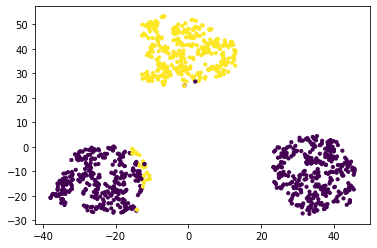

Dat1-3
Iter-round:13


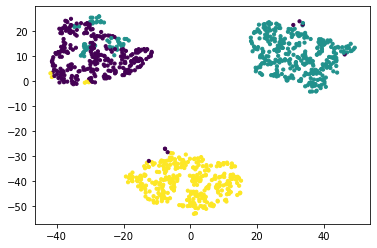

Dat1-4
Iter-round:11


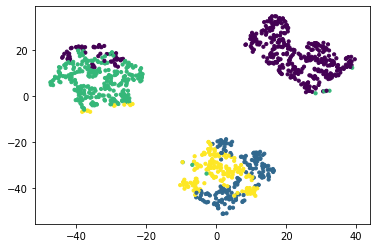

In [6]:
print("Dat1-2")
lbs = np.array(kmeans(dat1,2,50))
dat = np.array(dat1)
draw(dat,lbs)
print("Dat1-3")
lbs = np.array(kmeans(dat1,3,50))
dat = np.array(dat1)
draw(dat,lbs)
print("Dat1-4")
lbs = np.array(kmeans(dat1,4,50))
dat = np.array(dat1)
draw(dat,lbs)

Dat2-2
Iter-round:11


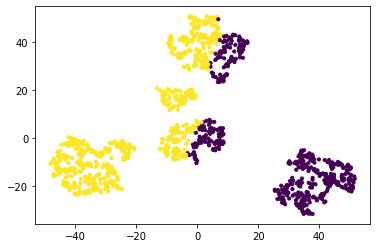

Dat2-3
Iter-round:4


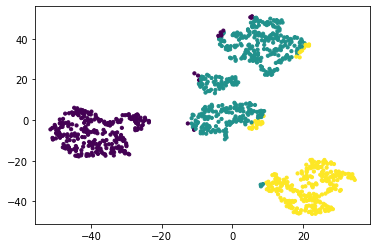

Dat2-4
Iter-round:7


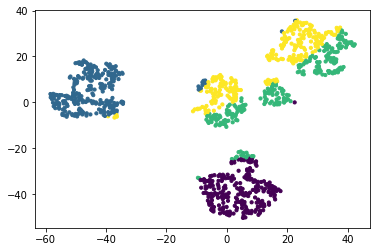

Dat2-5
Iter-round:40


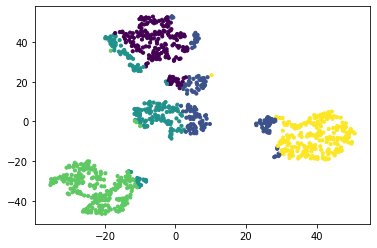

In [7]:
print("Dat2-2")
lbs = np.array(kmeans(dat2,2,50))
dat = np.array(dat2)
draw(dat,lbs)
print("Dat2-3")
lbs = np.array(kmeans(dat2,3,50))
dat = np.array(dat2)
draw(dat,lbs)
print("Dat2-4")
lbs = np.array(kmeans(dat2,4,50))
dat = np.array(dat2)
draw(dat,lbs)
print("Dat2-5")
lbs = np.array(kmeans(dat2,5,50))
dat = np.array(dat2)
draw(dat,lbs)

Dat2-4-0
Iter-round:22


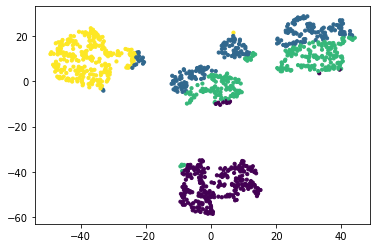

Dat2-4-1
Iter-round:40


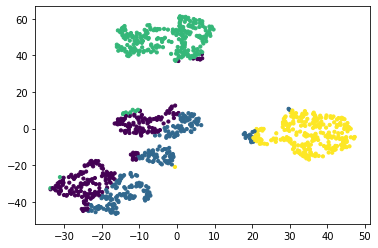

Dat2-4-2
Iter-round:10


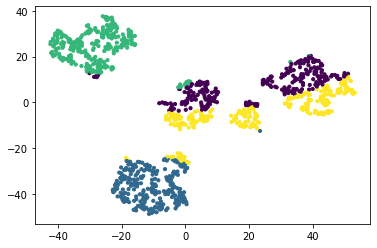

Dat2-4-3
Iter-round:10


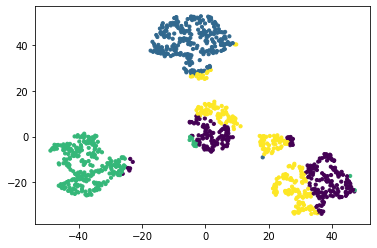

Dat2-4-4
Iter-round:25


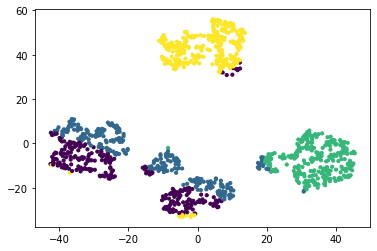

Dat2-4-5
Iter-round:6


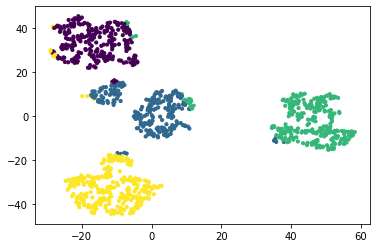

Dat2-4-6
Iter-round:10


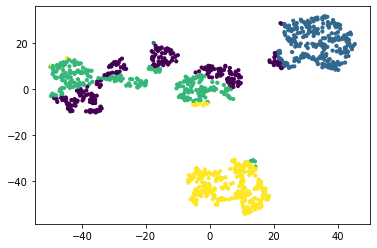

Dat2-4-7
Iter-round:9


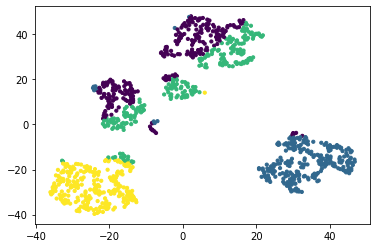

Dat2-4-8
Iter-round:7


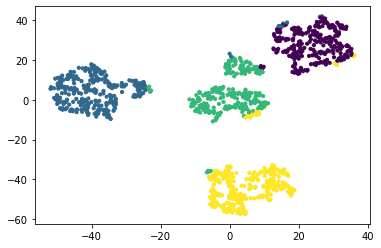

Dat2-4-9
Iter-round:10


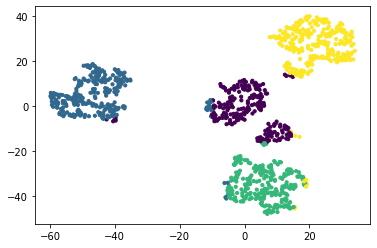

In [8]:
for i in range(10):
    print("Dat2-4-%d"% i)
    lbs = np.array(kmeans(dat2,4,50))
    dat = np.array(dat2)
    draw(dat,lbs)